1. Classify the sample points from “test.txt”.


In [1]:
testData = []
entry = []

with open("test-Minimum-Error-Rate-Classifier.txt") as f:
    for line in f:
        entry = line.split(",")
        if (entry[1][-1] == '\n'):
            entry[1] =  entry[1][:-1]
            
        testData.append( (float(entry[0]),(float(entry[1]))) )
    print(testData)

[(1.0, 1.0), (1.0, -1.0), (4.0, 5.0), (-2.0, 2.5), (0.0, 2.0), (2.0, -3.0)]


In [2]:
testData[0]

(1.0, 1.0)

In [3]:
import numpy as np

In [4]:
testData = np.array(testData)

In [5]:
testData

array([[ 1. ,  1. ],
       [ 1. , -1. ],
       [ 4. ,  5. ],
       [-2. ,  2.5],
       [ 0. ,  2. ],
       [ 2. , -3. ]])

In [6]:
testData[0]

array([1., 1.])

parameters 

In [7]:
miu1 = np.array([0 , 0])
miu2 = np.array([2 , 2])

sigma1 = np.array([[.25 , .3],
                  [.3 , 1]])
sigma2 = np.array([[.5 , 0],
                  [0 , .5]])

prior1 = .5
prior2 = .5

dimention = 2



In [8]:
np.multiply(sigma1,miu1)

array([[0., 0.],
       [0., 0.]])

In [9]:
# Import math Library
import math

# Print the value of pi
print (math.pi)


3.141592653589793


In [10]:
def normalDistribution(x ,mu , sigma ):
    size = len(x)
    determinantofSigma = np.linalg.det(sigma)

    norm_const = 1.0/ ( math.pow((2*math.pi),float(size)/2) * math.pow(determinantofSigma,1.0/2) )
    x_mu = np.matrix(x - mu)
    inv = np.matrix(sigma).I  
    
    
    result = math.pow(math.e, -0.5 * (x_mu * inv * x_mu.T))
    
    value = norm_const * result
    
    return value 

In [11]:
normalDistribution(testData[1] ,miu1 , sigma1  ) * prior1

0.0006137127856362327

In [12]:
normalDistribution(testData[1] ,miu2 , sigma2  ) * prior2

7.225623237724326e-06

In [13]:
np.linalg.det(sigma1)

0.15999999999999998

In [14]:
classified = {}

for i in testData:
    print(i , normalDistribution(i ,miu1 , sigma1  ) , normalDistribution(i ,miu2 , sigma2  ))
    if(normalDistribution(i ,miu1 , sigma1  ) * prior1 >= normalDistribution(i ,miu2 , sigma2  ) * prior2):
        print("class 1")
        classified[tuple(i)] = 1
        
    else:
        print("class 2")
        classified[tuple(i)] = 2
        
classified

[1. 1.] 0.0521914633650503 0.04307855860369727
class 1
[ 1. -1.] 0.0012274255712724654 1.4451246475448652e-05
class 1
[4. 5.] 4.8838803636217605e-15 7.19485196274015e-07
class 2
[-2.   2.5] 9.527738386953947e-13 2.7897468532175966e-08
class 2
[0. 2.] 0.017481950426164485 0.0058300489300563895
class 1
[ 2. -3.] 1.7046417432253508e-14 4.420669830983577e-12
class 2


{(1.0, 1.0): 1,
 (1.0, -1.0): 1,
 (4.0, 5.0): 2,
 (-2.0, 2.5): 2,
 (0.0, 2.0): 1,
 (2.0, -3.0): 2}

2. Classified samples should have different colored markers according to the assigned class label.


In [15]:
trainData1x = []
trainData1y = []
trainData2x = []
trainData2y = []

for coor , classinfo in classified.items():
    if(classinfo == 1):
        trainData1x.append(coor[0]);
        trainData1y.append(coor[1]);
    else:
        trainData2x.append(coor[0]);
        trainData2y.append(coor[1]);
    
print(trainData1x , trainData1y)
print(trainData2x , trainData2y)

[1.0, 1.0, 0.0] [1.0, -1.0, 2.0]
[4.0, -2.0, 2.0] [5.0, 2.5, -3.0]


In [16]:
max(trainData1x + trainData2x)

4.0

In [17]:
max(trainData1y + trainData2y)

5.0

In [18]:
import matplotlib.pyplot as plt

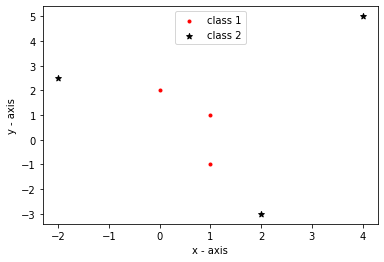

In [19]:
plt.scatter(trainData1x, trainData1y, color = 'r', marker = ".", label = 'class 1')

plt.scatter(trainData2x, trainData2y, color = 'k', marker = "*", label = 'class 2')

plt.xlabel('x - axis')
plt.ylabel('y - axis')

plt.legend(loc = 'upper center')

plt.show()

In [40]:
def finDistribution(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos.
    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

3 & 4 . Draw a figure which should include these points, the corresponding probability distribution function
along with its contour.

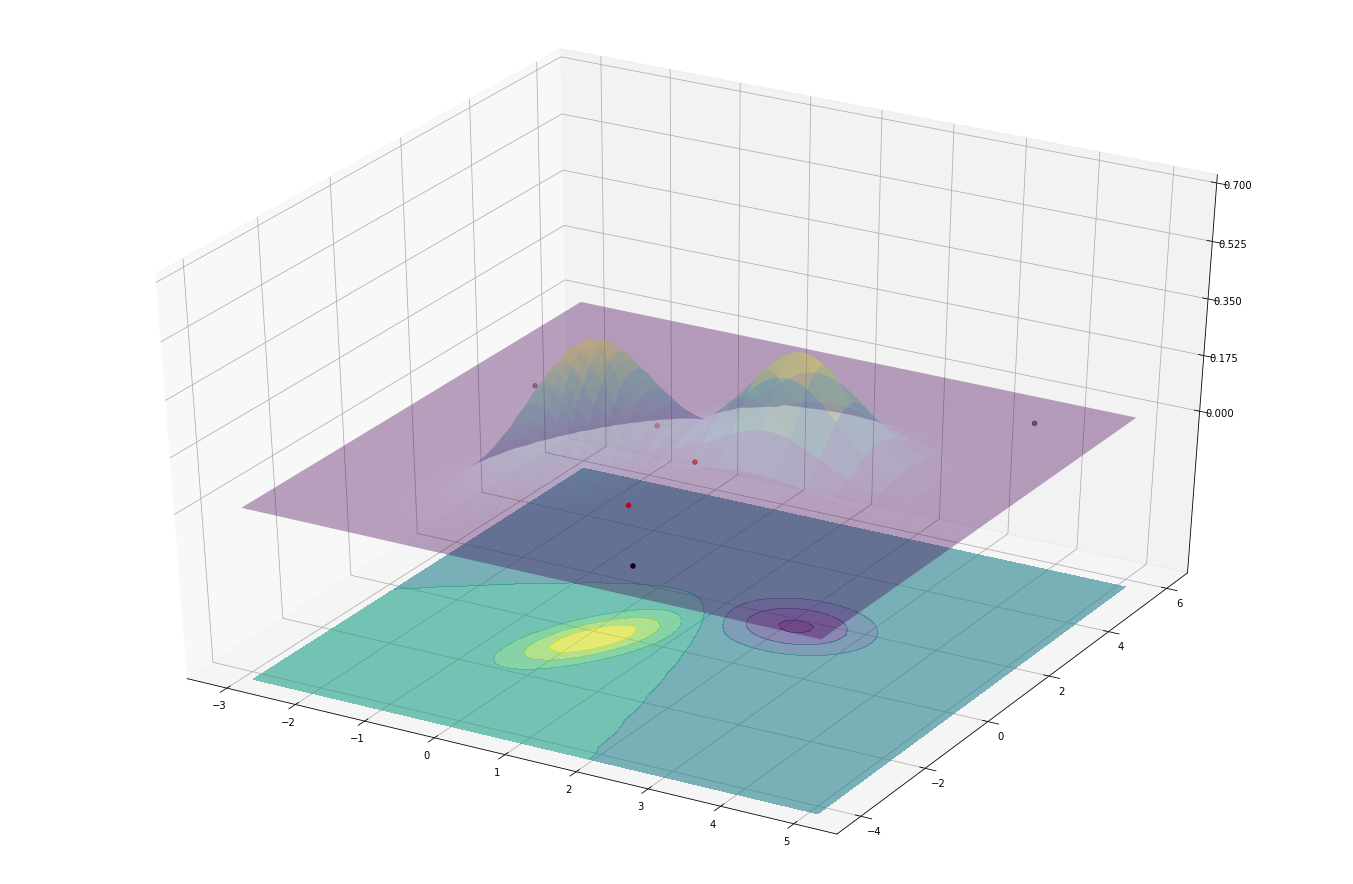

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Our 2-dimensional distribution will be over variables X and Y
N = 60
X = np.linspace(min(trainData1x + trainData2x)-1, max(trainData1x + trainData2x)+1, N)
Y = np.linspace(min(trainData1y + trainData2y)-1, max(trainData1y + trainData2y)+1, N)




X, Y = np.meshgrid(X, Y)


# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y



# The distribution on the variables X, Y packed into pos.


Z = finDistribution(pos, miu1, sigma1)



Z2 = finDistribution(pos, miu2, sigma2)


db = Z - Z2


#Z = Z + Z2





# Create a surface plot and projected filled contour plot under it.
fig = plt.figure(figsize = (24,16))
ax = fig.gca(projection='3d')




plt1 = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=1,alpha=.2, antialiased=True,cmap='viridis')

plt2 = ax.plot_surface(X, Y, Z2, rstride=3, cstride=3, linewidth=1,alpha=.2, antialiased=True,cmap='viridis')

#ax.hold(True)

#ax.scatter(points2[0], point2[1], point2[2], color='green')

ax.scatter(trainData1x, trainData1y, color = 'r', marker = "o", label = 'class 1')

ax.scatter(trainData2x, trainData2y, color = 'k', marker = "o", label = 'class 2')





#cset1 = ax.contourf(X, Y, Z, zdir='z', offset=-.55, alpha=.6, cmap='viridis')
#cset2 = ax.contourf(X, Y, Z2, zdir='z', offset=-.55, alpha=.6, cmap='viridis')


decisionBoundary = ax.contourf(X, Y, db, zdir='z', offset=-0.55, alpha=.6, cmap='viridis')
#cset = ax.contourf(X, Y, Z2, zdir='z', offset=-.2, cmap='binary')

#decision boundary
#ax.plot(trainData1x , trainData1y, "--r", label = 'Decision Boundary')






# Adjust the limits, ticks and view angle
ax.set_zlim(-.5,.5)
ax.set_zticks(np.linspace(0,0.7,5))
ax.view_init(35, 300)

#ax.view_init(35, 240)

plt.show()